### **Árboles de decisión**

Son modelos predictivos que utilizan un conjunto de reglas basadas en características de los datos para tomar decisiones.

Un árbol de decisión es una estructura jerárquica en la que cada nodo representa una característica (o atributo) de los datos,
cada rama representa un resultado de esa característica, y cada hoja representa una etiqueta de clase o un valor de predicción.

`EJEMPLOS DE USO`

Probabilidad de compra:<br>
Variables: Ingreso, Edad, Género<br>
Objetivo: Determinar si una persona va a hacer cierta compra o no.<br>

    A[Ingreso > $70,000] -->|Sí| B[Edad]
    B -->|≥ 40| C[Compra: Sí]
    B -->|< 40| D[Compra: No]
    A -->|No| E[Ha comprado antes]
    E -->|Sí| F[Comprará: Sí]
    E -->|No| G[Comprará: No]

`Ingreso:` se utiliza como el primer criterio de decisión.<br>
Si el ingreso es superior a $70,000, el árbol de decisión se basa en la edad. Si no, se basa en el género.<br>

`Edad:` determina la probabilidad de compra para clientes con cierta edad<br>

`Ha comprado antes` determina la probabilidad de compra para clientes que han comprado antes

In [ ]:
!pip3 install numpy pandas matplotlib scikit-learn

In [1]:
# Importar las bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

print("Todas las bibliotecas se importaron correctamente.")

Todas las bibliotecas se importaron correctamente.


In [2]:
# Generar datos sintéticos para segmentación de mercado
np.random.seed(42)
n = 100
# Factores a tomar en cuenta para la segmentacion de mercado
# - edad: entre 18 y 70 años
# - ingreso: entre 20000 y 120000
# - ha comprado antes: si o no
# - compra: sí o no

# Tenemos dos data sets, uno con un patrón muy claro y otro completamente aleatorio, esto es útil para observar como varía la
# precisión en las predicciones

# Aqui podemos ver un patron muy claro de compra
ingresos = np.random.randint(20000, 100000, n)
edad = np.random.randint(18, 70, n)
ha_comprado_antes = np.random.randint(0, 2, n)
comprara = []
for i in range(n):
    if ingresos[i] > 70000:
        if edad[i] >= 40:
            comprara.append(1)  # Sí
        else:
            comprara.append(0)  # No
    else:
        if ha_comprado_antes[i] == 1:
            comprara.append(1)  # Sí
        else:
            comprara.append(0)  # No
            
data = {
    'Edad': edad,
    'Ingresos': ingresos,
    'HaCompradoAntes': ha_comprado_antes,
    'Comprará': comprara
}

# Aquií tenemos un dataset con valores totalmente aleatorios, la exactitud debería bajar considerablemente
# ingresos = np.random.randint(20000, 120000, n)
# edad = np.random.randint(18, 70, n)
# ha_comprado_antes = np.random.choice([0, 1], n)
# comprara = np.random.choice(['Sí', 'No'], n)

# # Crear DataFrame
# data = {
#     'Edad': edad,
#     'Ingresos': ingresos,
#     'HaCompradoAntes': ha_comprado_antes,
#     'Comprará': comprara
# }

# Convertir el dataset en un DataFrame de pandas
df= pd.DataFrame(data)

# Guardar a CSV
df.to_csv('segmentacion_mercado.csv', index=False)


In [4]:
# # Cargar datos
data = pd.read_csv('segmentacion_mercado.csv')

# # Mostrar las primeras filas
print(data.head())

# # Estadísticas descriptivas
# # count: valores no nulos
# # mean: promedio (suma de los valores de cada columna entre numero de filas)
# # std: desviación estandar
# # min: valor minimo por columna
# # 25%: el 25% de las casa están por debajo de esos valores
# # 50%: el 50% de las casa están por debajo de esos valores
# # 75%: el 75% de las casa están por debajo de esos valores
# # max: valor máximo por columna
print(data.describe())

   Edad  Ingresos  HaCompradoAntes  Comprará
0    41     35795                1         1
1    54     20860                1         1
2    52     96820                0         1
3    61     74886                0         1
4    57     26265                1         1
             Edad      Ingresos  HaCompradoAntes    Comprará
count  100.000000    100.000000       100.000000  100.000000
mean    45.310000  60613.150000         0.510000    0.580000
std     15.669371  24208.906244         0.502418    0.496045
min     18.000000  20769.000000         0.000000    0.000000
25%     31.750000  38113.000000         0.000000    0.000000
50%     47.000000  60765.500000         1.000000    1.000000
75%     58.000000  83904.250000         1.000000    1.000000
max     69.000000  98953.000000         1.000000    1.000000


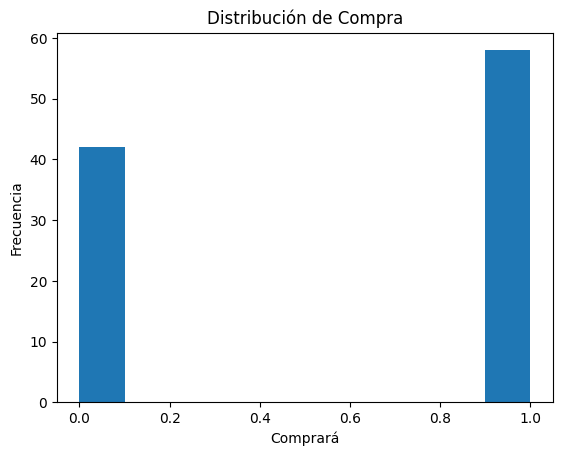

In [5]:
# Distribución de compra
plt.hist(data['Comprará'])
plt.xlabel('Comprará')
plt.ylabel('Frecuencia')
plt.title('Distribución de Compra')
plt.show()

# Codificar las variables categóricas
label_encoder = LabelEncoder()
data['HaCompradoAntes'] = label_encoder.fit_transform(data['HaCompradoAntes'])
data['Comprará'] = label_encoder.fit_transform(data['Comprará'])

# Aqui podemos ver una gráfica, donde en el eje x estan las opciones ('Sí' y 'No') 
# En el eje y vemos la frecuencia de cada categoría en los datos. 
# La frecuencia indica cuántas veces aparece cada categoría en un conjunto de datos.

In [6]:
# Características que vamos a tener en cuenta para entrenar el modelo
X = df[['Edad', 'Ingresos', 'HaCompradoAntes']]
y = df['Comprará']

# Dividir en conjuntos de entrenamiento y prueba
# X variables que se usarán para la predicción
# y variable que queremos predecir
# test_size=0.2: indica que usaremos el 20% de los datos para el conjunto de prueba y el 80% para el conjunto de entrenamiento
# Conjunto de entrenamiento se usa para entrenar el modelo, se usa para enseñar al modelo la relacion entre los patrones en los datos (mientras mas, mejor)
# Conjunto de prueba se usa para comparar las predicciones y ver que tan acertadas son
# random_state: se utiliza para controlar cómo se dividen los datos aleatorios. Si dos personas ejecutan la misma función con el mismo valor para random_state, 
#   obtendrán exactamente la misma división de datos (pruebas y entrenamiento).
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# Crear el modelo
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [8]:

# Predecir en el conjunto de prueba
y_pred_tree = model.predict(X_test)

# Evaluar el modelo
print("Árbol de Decisión - Exactitud:", accuracy_score(y_test, y_pred_tree))

# Precisión (Precision): La proporción de verdaderos positivos sobre el total de predicciones positivas (TP / (TP + FP)).
# Cobertura (Recall): La proporción de verdaderos positivos sobre el total de instancias verdaderamente positivas (TP / (TP + FN)).
# F1 Score: La media armónica de precisión y cobertura, proporcionando un balance entre ambas métricas (2 * (Precision * Recall) / (Precision + Recall)).
# Soporte (Support): El número de ocurrencias reales de la clase en los datos.
print("Árbol de Decisión - Reporte de clasificación:\n", classification_report(y_test, y_pred_tree))

# Matriz de confusion
# TP (True Positives): Las predicciones correctas donde el modelo predice la clase positiva correcta.
# FP (False Positives): Las predicciones incorrectas donde el modelo predice la clase positiva pero la instancia es negativa.
# FN (False Negatives): Las predicciones incorrectas donde el modelo predice la clase negativa pero la instancia es positiva.
# TN (True Negatives): Las predicciones correctas donde el modelo predice la clase negativa correcta.

#                  Predicción Positiva	   Predicción Negativa
# Clase Positiva	       TP	                       FN
# Clase Negativa	       FP                        TN

print("Árbol de Decisión - Matriz de confusión:\n", confusion_matrix(y_test, y_pred_tree))

Árbol de Decisión - Exactitud: 1.0
Árbol de Decisión - Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        18

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Árbol de Decisión - Matriz de confusión:
 [[12  0]
 [ 0 18]]


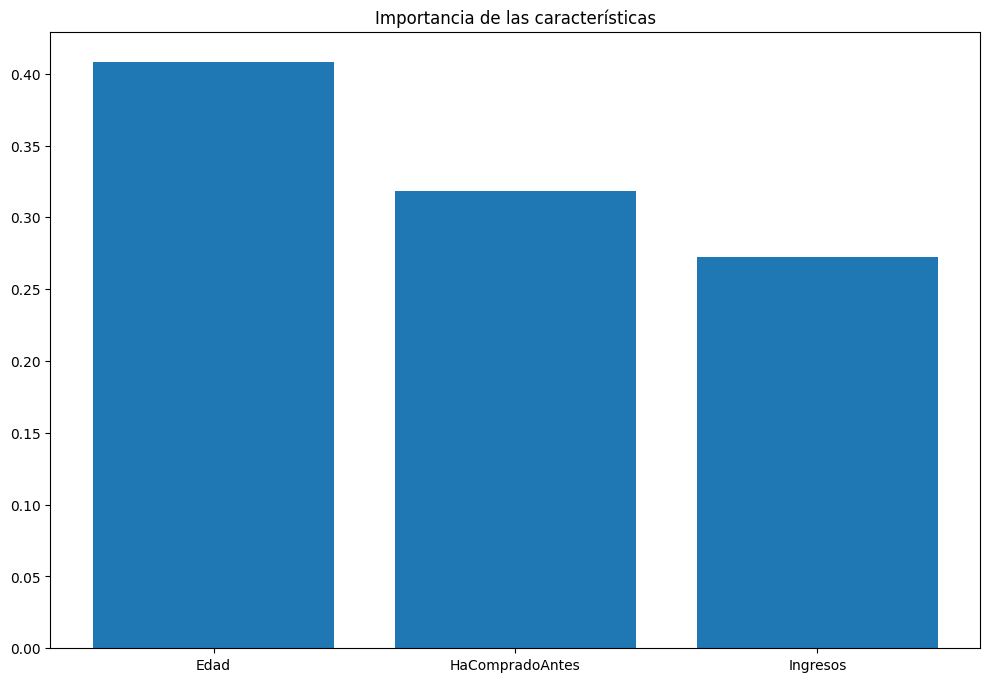

In [10]:
# from sklearn.tree import plot_tree

# # Visualizar la importancia de las características
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

## En la siguiente gráfica podemos ver cuales son las características más importante a considerar

plt.figure(figsize=(12, 8))
plt.title('Importancia de las características')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [features[i] for i in indices])
plt.show()
